In [1]:
%load_ext autoreload
%autoreload 2

%cd '..'

/dss/dsshome1/03/di93fup/polarization_reddit


In [2]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

sns.set_theme()
import matplotlib.pyplot as plt

In [3]:
# Mass shootings polarization data

data_mass_shootings = {
    "Date": [
        "2015-07-16",
        "2015-10-01",
        "2015-11-27",
        "2015-12-02",
        # "2016-02-20",
        "2016-06-12",
        "2016-07-07",
        "2016-07-17",
        "2016-09-16",
        "2017-01-06",
        "2017-04-18",
        "2017-06-14",
        "2017-10-01",
        "2017-11-01",
        "2017-11-05",
        "2018-02-14",
        "2018-04-22",
        "2018-05-18",
        "2018-06-28",
        "2018-10-27",
        "2018-11-07",
    ],
    "Victims": [
        7, 18, 12, 35, 
        #8,
        102, 16, 6, 5, 11, 3, 5, 604, 3, 46, 31, 8, 23, 7, 18, 23,
    ],
    "Ethnicity": [
        "middle east",
        "mixed",
        "white",
        "middle east",
        # "white",
        "middle east",
        "black",
        "black",
        "middle east",
        "hispanic",
        "black",
        "asian",
        "white",
        "white",
        "white",
        "white",
        "white",
        "white",
        "white",
        "white",
        "white",
    ],
    "Event": [
        "Chattanooga",
        "Roseburg",
        "Colorado Springs",
        "San Bernardino",
        # "Kalamazoo",
        "Orlando Nightclub",
        "Dallas Police",
        "Baton Rouge Police",
        "Burlington",
        "Fort Lauderdale Airport",
        "Fresno",
        "San Francisco Cafe",
        "Vegas",
        "Thornton Walmart",
        "Sutherland Springs Church",
        "Parkland School",
        "Nashville Waffle House",
        "Santa Fe High School",
        "Annapolis Journal",
        "Pittsburgh Synagogue",
        "Thousand Oaks Bar",
    ],
    "Polarization": [
        0.5159,
        0.5139,
        0.5113,
        0.5045,
        # 0.5038,
        0.5084,
        0.5058,
        0.5059,
        0.5283,
        0.4995,
        0.5215,
        0.5075,
        0.5074,
        0.5051,
        0.5163,
        0.5049,
        0.5023,
        0.5040,
        0.5087,
        0.5080,
        0.5101,
    ],
    "Random": [
        0.5064,
        0.5017,
        0.5000,
        0.4986,
        # 0.4574,
        0.4999,
        0.5004,
        0.4969,
        0.4986,
        0.4905,
        0.4952,
        0.4998,
        0.5003,
        0.5001,
        0.5000,
        0.5002,
        0.5004,
        0.4983,
        0.5002,
        0.5003,
        0.4981,
    ],
    "Number of users": [
        216,
        148,
        4306,
        1863,
        # 33,
        5980,
        2677,
        275,
        441,
        147,
        204,
        1457,
        7563,
        3119,
        360,
        3487,
        539,
        320,
        198,
        874,
        83,
    ],
}

df_mass_shootings = pd.DataFrame(data_mass_shootings)

# Convert date from string to datetime
df_mass_shootings["Date"] = pd.to_datetime(df_mass_shootings["Date"])
df_mass_shootings["Timestamp"] = df_mass_shootings["Date"].apply(lambda x: x.timestamp())


In [4]:
X = sm.add_constant( df_mass_shootings["Timestamp"] / 2629746) # to month

model = sm.OLS(
    df_mass_shootings["Polarization"],
    X,
)
results = model.fit()

print(results.params)
print(results.summary())

const        0.585606
Timestamp   -0.000134
dtype: float64
                            OLS Regression Results                            
Dep. Variable:           Polarization   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     1.197
Date:                Fri, 14 Jul 2023   Prob (F-statistic):              0.288
Time:                        09:47:12   Log-Likelihood:                 72.416
No. Observations:                  20   AIC:                            -140.8
Df Residuals:                      18   BIC:                            -138.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

In [5]:
X = sm.add_constant(df_mass_shootings["Victims"])

model = sm.OLS(
    df_mass_shootings["Polarization"],
    X,
)
results = model.fit()

print(results.params)
print(results.summary())

const      0.509685
Victims   -0.000004
dtype: float64
                            OLS Regression Results                            
Dep. Variable:           Polarization   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                 -0.048
Method:                 Least Squares   F-statistic:                    0.1353
Date:                Fri, 14 Jul 2023   Prob (F-statistic):              0.717
Time:                        09:47:15   Log-Likelihood:                 71.848
No. Observations:                  20   AIC:                            -139.7
Df Residuals:                      18   BIC:                            -137.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

In [11]:
X = sm.add_constant((df_mass_shootings["Ethnicity"] == "white").astype(int))

model = sm.OLS(
    df_mass_shootings["Polarization"],
    X,
)
results = model.fit()

print(results.params)
print(results.summary())

const        0.51112
Ethnicity   -0.00331
dtype: float64
                            OLS Regression Results                            
Dep. Variable:           Polarization   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     1.174
Date:                Tue, 11 Jul 2023   Prob (F-statistic):              0.293
Time:                        17:19:08   Log-Likelihood:                 72.405
No. Observations:                  20   AIC:                            -140.8
Df Residuals:                      18   BIC:                            -138.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

0 Chattanooga
1 Roseburg
2 Colorado Springs
3 San Bernardino
4 Orlando Nightclub
5 Dallas Police
6 Baton Rouge Police
7 Burlington
8 Fort Lauderdale Airport
9 Fresno
10 San Francisco Cafe
11 Vegas
12 Thornton Walmart
13 Sutherland Springs Church
14 Parkland School
15 Nashville Waffle House
16 Santa Fe High School
17 Annapolis Journal
18 Pittsburgh Synagogue
19 Thousand Oaks Bar


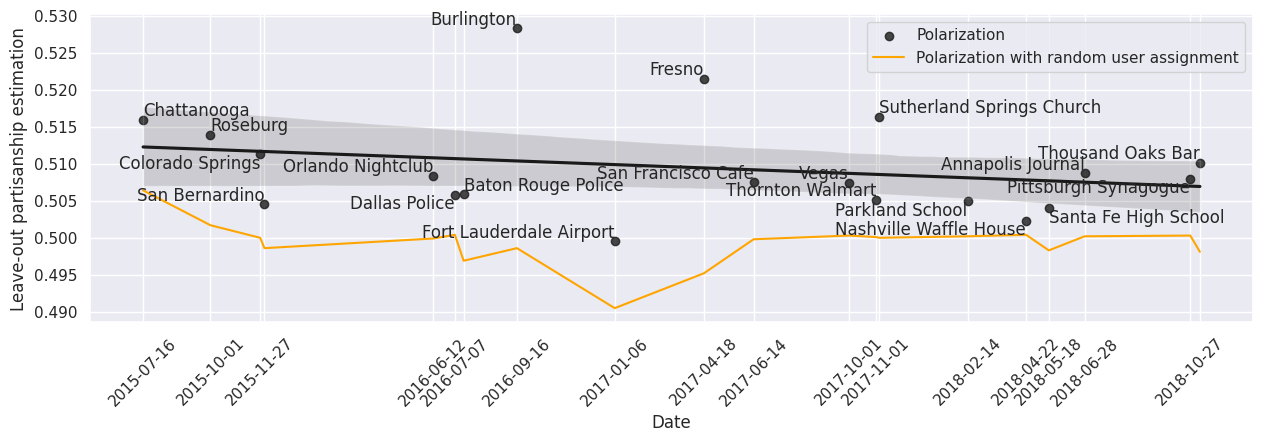

In [20]:
plt.figure(figsize=(15, 4))
sns.regplot(
    data=df_mass_shootings,
    x="Timestamp",
    y="Polarization",
    marker="o",
    color="k",
    label="Polarization",
)

for i, row in df_mass_shootings.iterrows():
    print(i, row["Event"])
    plt.text(
        row["Timestamp"],
        row["Polarization"],
        row["Event"],
        horizontalalignment="left" if i in (0, 1, 6, 13, 16) else "right",
        verticalalignment="top" if i in (2, 5, 14, 15, 16, 18) else "bottom",
    )
sns.lineplot(
    data=df_mass_shootings,
    x="Timestamp",
    y="Random",
    label="Polarization with random user assignment",
    color="orange",
)
# display timestamp as date
plt.xticks(
    df_mass_shootings["Timestamp"],
    [
        date if i not in (3, 6, 13, 19) else ""
        for i, date in enumerate(df_mass_shootings["Date"].dt.date)
    ],
    rotation=45,
)

plt.xlabel("Date")
plt.ylabel("Leave-out partisanship estimation")

plt.savefig(
    f"data/figures/gun_control/07_08/mass_shootings_polarization.pdf",
    bbox_inches="tight",
)
plt.show()


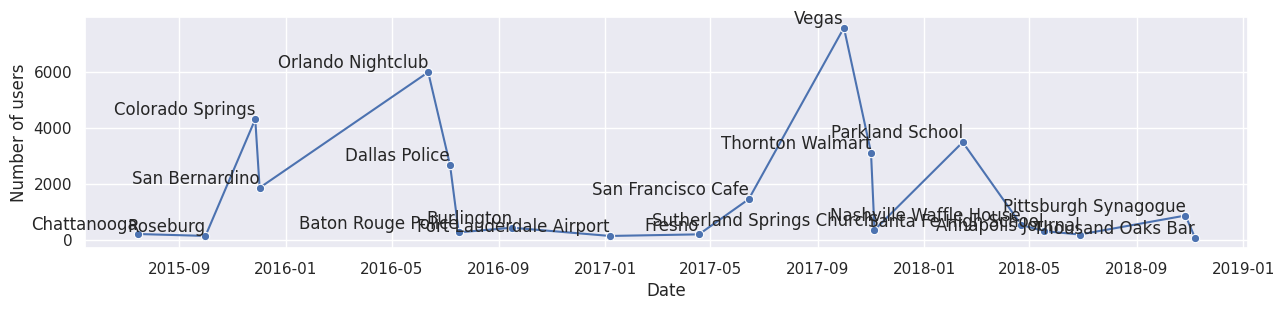

In [7]:
plt.figure(figsize=(15, 3))
sns.lineplot(data=df_mass_shootings, x="Date", y="Number of users", marker="o")

for i, row in df_mass_shootings.iterrows():
    plt.text(
        row["Date"],
        row["Number of users"],
        row["Event"],
        horizontalalignment="right",
        verticalalignment="bottom",
    )

plt.show()

In [3]:
data_gun_control = {
    "Date": [
        "2015-07-16",
        "2015-10-01",
        "2015-11-27",
        "2015-12-02",
        "2016-02-20",
        "2016-06-12",
        "2016-07-07",
        "2016-07-17",
        "2016-09-16",
        "2017-01-06",
        "2017-04-18",
        "2017-06-14",
        "2017-10-01",
        "2017-11-01",
        "2017-11-05",
        "2018-02-14",
        "2018-04-22",
        "2018-05-18",
        "2018-06-28",
        "2018-10-27",
        "2018-11-07",
    ],
    "Event": [
        "Chattanooga",
        "Roseburg",
        "Colorado Springs",
        "San Bernardino",
        "Kalamazoo",
        "Orlando Nightclub",
        "Dallas Police",
        "Baton Rouge Police",
        "Burlington",
        "Fort Lauderdale Airport",
        "Fresno",
        "San Francisco Cafe",
        "Las Vegas",
        "Thornton Walmart",
        "Sutherland Springs Church",
        "Parkland School",
        "Nashville Waffle House",
        "Santa Fe High School",
        "Annapolis Journal",
        "Pittsburgh Synagogue",
        "Thousand Oaks Bar",
    ],
       "Victims": [
        7, 18, 12, 35, 
        8,
        102, 16, 6, 5, 11, 3, 5, 604, 3, 46, 31, 8, 23, 7, 18, 23,
    ],
    "Ethnicity": [
        "middle east",
        "mixed",
        "white",
        "middle east",
        "white",
        "middle east",
        "black",
        "black",
        "middle east",
        "hispanic",
        "black",
        "asian",
        "white",
        "white",
        "white",
        "white",
        "white",
        "white",
        "white",
        "white",
        "white",
    ],
    "Polarization": [
        0.5162,
        0.5223,
        0.5150,
        0.5151,
        0.5294,
        0.5293,
        0.5252,
        0.5226,
        0.5186,
        0.5183,
        0.5189,
        0.5156,
        0.5159,
        0.5156,
        0.5148,
        0.5129,
        0.5139,
        0.5129,
        0.5139,
        0.5124,
        0.5128,
    ],
    "Random": [
        0.5000,
        0.5002,
        0.4999,
        0.4997,
        0.4999,
        0.5000,
        0.5002,
        0.5000,
        0.5000,
        0.4999,
        0.4999,
        0.5000,
        0.5000,
        0.5001,
        0.5001,
        0.5001,
        0.5000,
        0.4999,
        0.5000,
        0.5001,
        0.5000,
    ],
    "Number of users": [
        21126,
        29736,
        24806,
        25110,
        64845,
        64597,
        56063,
        76514,
        64378,
        80051,
        75677,
        76493,
        79063,
        81348,
        79348,
        94575,
        83970,
        84693,
        93024,
        117111,
        115416,
    ],
}


df_gun_control = pd.DataFrame(data_gun_control)

# Convert date from string to datetime
df_gun_control["Date"] = pd.to_datetime(df_gun_control["Date"])
df_gun_control["Timestamp"] = df_gun_control["Date"].apply(lambda x: x.timestamp())


In [15]:
X = sm.add_constant(df_gun_control["Victims"])

model = sm.OLS(
    df_gun_control["Polarization"],
    X,
)
results = model.fit()

print(results.params)
print(results.summary())

const      0.517747
Victims   -0.000001
dtype: float64
                            OLS Regression Results                            
Dep. Variable:           Polarization   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.052
Method:                 Least Squares   F-statistic:                   0.01418
Date:                Tue, 11 Jul 2023   Prob (F-statistic):              0.906
Time:                        17:24:34   Log-Likelihood:                 81.192
No. Observations:                  21   AIC:                            -158.4
Df Residuals:                      19   BIC:                            -156.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

In [16]:

X = sm.add_constant((df_gun_control["Ethnicity"] == "white").astype(int))

model = sm.OLS(
    df_gun_control["Polarization"],
    X,
)
results = model.fit()

print(results.params)
print(results.summary())

const        0.520210
Ethnicity   -0.004801
dtype: float64
                            OLS Regression Results                            
Dep. Variable:           Polarization   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.183
Method:                 Least Squares   F-statistic:                     5.480
Date:                Tue, 11 Jul 2023   Prob (F-statistic):             0.0303
Time:                        17:24:42   Log-Likelihood:                 83.846
No. Observations:                  21   AIC:                            -163.7
Df Residuals:                      19   BIC:                            -161.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

In [ ]:
X = sm.add_constant(df_mass_shootings["Victims"])

model = sm.OLS(
    df_mass_shootings["Polarization"],
    X,
)
results = model.fit()

print(results.params)
print(results.summary())

const      0.509685
Victims   -0.000004
dtype: float64
                            OLS Regression Results                            
Dep. Variable:           Polarization   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                 -0.048
Method:                 Least Squares   F-statistic:                    0.1353
Date:                Tue, 11 Jul 2023   Prob (F-statistic):              0.717
Time:                        17:17:21   Log-Likelihood:                 71.848
No. Observations:                  20   AIC:                            -139.7
Df Residuals:                      18   BIC:                            -137.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

In [ ]:
X = sm.add_constant((df_mass_shootings["Ethnicity"] == "white").astype(int))

model = sm.OLS(
    df_mass_shootings["Polarization"],
    X,
)
results = model.fit()

print(results.params)
print(results.summary())

const        0.51112
Ethnicity   -0.00331
dtype: float64
                            OLS Regression Results                            
Dep. Variable:           Polarization   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     1.174
Date:                Tue, 11 Jul 2023   Prob (F-statistic):              0.293
Time:                        17:19:08   Log-Likelihood:                 72.405
No. Observations:                  20   AIC:                            -140.8
Df Residuals:                      18   BIC:                            -138.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

In [9]:
df_gun_control

,Date,Event,Polarization,Random,Number of users,Timestamp
0,2015-06-17,Charleston Church,0.5179,0.5000,19423,1.434499e+09
1,2015-07-16,Chattanooga,0.5162,0.5000,21126,1.437005e+09
2,2015-10-01,Roseburg,0.5223,0.5002,29736,1.443658e+09
3,2015-11-27,Colorado Springs,0.5150,0.4999,24806,1.448582e+09
4,2015-12-02,San Bernardino,0.5151,0.4997,25110,1.449014e+09
5,2016-02-20,Kalamazoo,0.5294,0.4999,64845,1.455926e+09
6,2016-06-12,Orlando Nightclub,0.5293,0.5000,64597,1.465690e+09
7,2016-07-07,Dallas Police,0.5252,0.5002,56063,1.467850e+09
8,2016-07-17,Baton Rouge Police,0.5226,0.5000,76514,1.468714e+09
9,2016-09-16,Burlington,0.5186,0.5000,64378,1.473984e+09


In [13]:
import statsmodels.api as sm

X = sm.add_constant( df_gun_control["Timestamp"] / 2629746) # to month

model = sm.OLS(
    df_gun_control["Polarization"],
    X,
)
results = model.fit()

print(results.params)
print(results.summary())

const        0.642954
Timestamp   -0.000221
dtype: float64
                            OLS Regression Results                            
Dep. Variable:           Polarization   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                  0.303
Method:                 Least Squares   F-statistic:                     10.13
Date:                Mon, 10 Jul 2023   Prob (F-statistic):            0.00468
Time:                        18:11:19   Log-Likelihood:                 90.068
No. Observations:                  22   AIC:                            -176.1
Df Residuals:                      20   BIC:                            -174.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

0 Chattanooga
1 Roseburg
2 Colorado Springs
3 San Bernardino
4 Kalamazoo
5 Orlando Nightclub
6 Dallas Police
7 Baton Rouge Police
8 Burlington
9 Fort Lauderdale Airport
10 Fresno
11 San Francisco Cafe
12 Las Vegas
13 Thornton Walmart
14 Sutherland Springs Church
15 Parkland School
16 Nashville Waffle House
17 Santa Fe High School
18 Annapolis Journal
19 Pittsburgh Synagogue
20 Thousand Oaks Bar


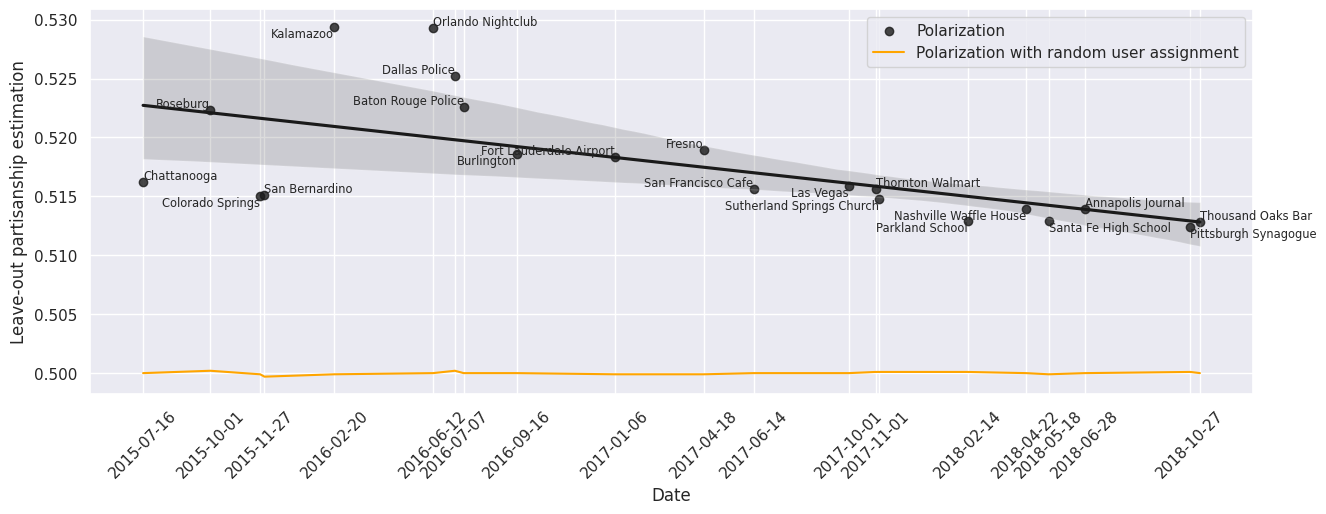

In [20]:
plt.figure(figsize=(15, 5))
sns.regplot(
    data=df_gun_control,
    x="Timestamp",
    y="Polarization",
    marker="o",
    color="k",
    label="Polarization",
)
sns.lineplot(
    data=df_gun_control,
    x="Timestamp",
    y="Random",
    label="Polarization with random user assignment",
    color="orange",
)
for i, row in df_gun_control.iterrows():
    print(i, row["Event"])
    plt.text(
        row["Timestamp"],
        row["Polarization"],
        row["Event"],
        horizontalalignment="left" if i in (0, 3, 5, 13, 17, 18, 19, 20) else "right",
        verticalalignment="top" if i in (2, 4, 8, 12, 14, 15, 16, 17, 19) else "bottom",
        fontsize="x-small",
    )
# display timestamp as date
plt.xticks(
    df_gun_control["Timestamp"],
    [
        date if i not in (3, 7, 14, 20) else ""
        for i, date in enumerate(df_gun_control["Date"].dt.date)
    ],
    rotation=45,
)

plt.xlabel("Date")
plt.ylabel("Leave-out partisanship estimation")

plt.savefig(
    f"data/figures/gun_control/07_08/mass_shootings_gun_control_polarization.pdf",
    bbox_inches="tight",
)

plt.show()
